## Question 1 😁

In [151]:
import numpy as np
import pandas as pd

In [152]:
a=[6.25,6.5,6.5,6,6.25,6.25]
b=[4.03,4.02,4.02,4.04,4.03,4.03]
data={"A":a,
      "B":b}
df=pd.DataFrame(data)

In [153]:
df.head()

,A,B
0,6.25,4.03
1,6.50,4.02
2,6.50,4.02
3,6.00,4.04
4,6.25,4.03


(a) Strength and Direction

In [154]:
import statistics as stat
corr=stat.correlation(df["A"],df["B"])
print(corr)

-1.0


(c) Best Fitted Line

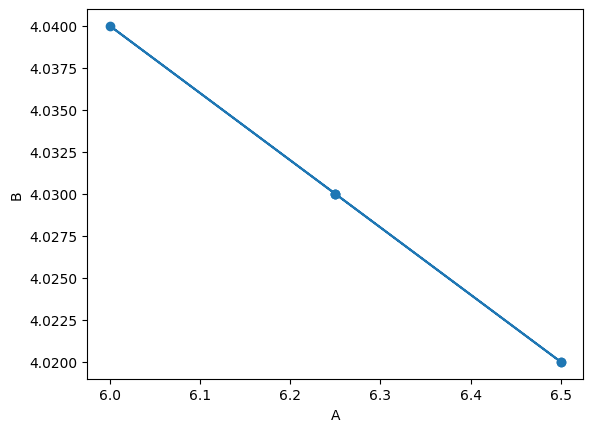

In [155]:
import matplotlib.pyplot as plt
plt.scatter(df["A"],df["B"])
plt.plot(df["A"],df["B"])
plt.xlabel("A")
plt.ylabel("B")
plt.show()

(d) Linear Regression with Gradient Descent

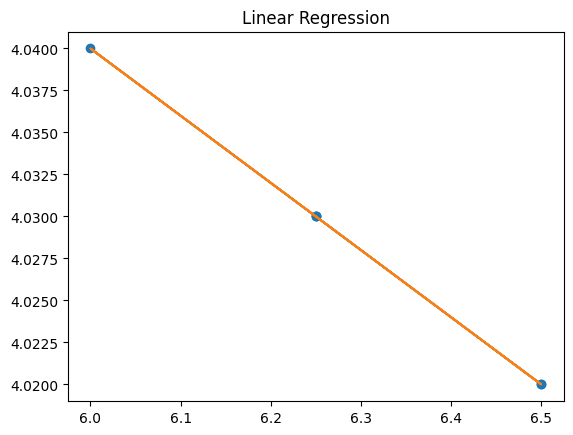

In [156]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(df["A"],df["B"])
def line(x):
  return slope * x + intercept
model1 = list(map(line, df["A"]))
plt.scatter(df["A"], df["B"])
plt.plot(df["A"],df["B"])
plt.title("Linear Regression")
plt.plot(df["A"], model1)
plt.show()

In [157]:
print(model1)

[4.03, 4.0200000000000005, 4.0200000000000005, 4.040000000000001, 4.03, 4.03]


In [158]:
mean_squared_error(model1,df["B"])

3.944304526105059e-31

Iteration 0: Slope = 0.0051, Intercept = 0.0008, MSE = 16.2275
Iteration 100: Slope = 0.3502, Intercept = 0.0557, MSE = 3.1861
Iteration 200: Slope = 0.5029, Intercept = 0.0800, MSE = 0.6340
Iteration 300: Slope = 0.5704, Intercept = 0.0908, MSE = 0.1345
Iteration 400: Slope = 0.6003, Intercept = 0.0956, MSE = 0.0368
Iteration 500: Slope = 0.6135, Intercept = 0.0978, MSE = 0.0177
Iteration 600: Slope = 0.6193, Intercept = 0.0987, MSE = 0.0139
Iteration 700: Slope = 0.6219, Intercept = 0.0992, MSE = 0.0132
Iteration 800: Slope = 0.6230, Intercept = 0.0995, MSE = 0.0131
Iteration 900: Slope = 0.6235, Intercept = 0.0996, MSE = 0.0130


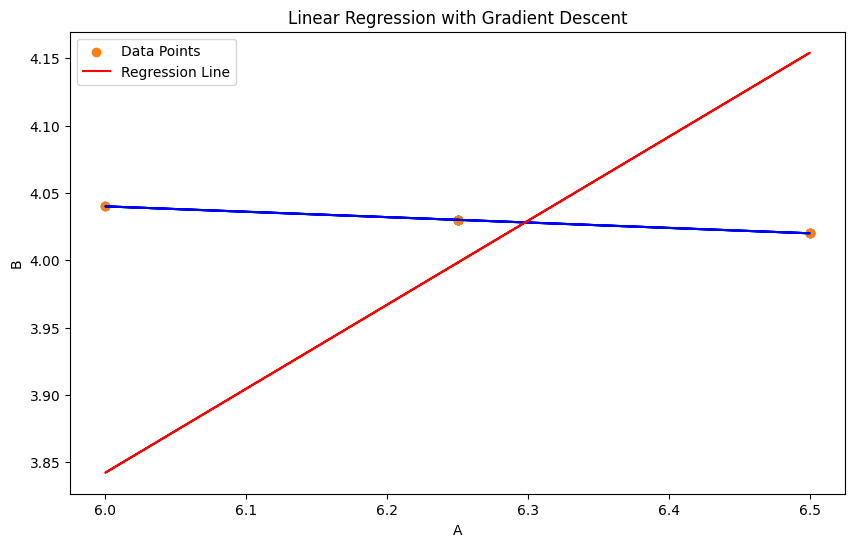

Final Slope: -0.04000000000000124
Final Intercept: 4.280000000000008
Mean Absolute Error: 0.09358571507921802
Mean Squared Error: 0.013020481859353866
R-squared: -274.72785113924135


In [164]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

learning_rate = 0.0001
iterations = 1000

slope = 0
intercept = 0
n = len(df)

for i in range(iterations):
    y_pred = slope * df["A"] + intercept
    d_slope = (-2/n) * sum(df["A"] * (df["B"] - y_pred))
    d_intercept = (-2/n) * sum(df["B"] - y_pred)
    slope -= learning_rate * d_slope
    intercept -= learning_rate * d_intercept
    if i % 100 == 0:
        mse = mean_squared_error(df["B"], y_pred)
        print(f"Iteration {i}: Slope = {slope:.4f}, Intercept = {intercept:.4f}, MSE = {mse:.4f}")
def line(x):
    return slope * x + intercept

model = list(map(line, df["A"]))
slope, intercept, r, p, std_err = stats.linregress(df["A"],df["B"])
def line(x):
  return slope * x + intercept
model1 = list(map(line, df["A"]))

plt.figure(figsize=(10, 6))
plt.scatter(df["A"], df["B"])
plt.plot(df["A"],df["B"],color="green")
plt.plot(df["A"], model1,color='blue')
plt.scatter(df["A"], df["B"], label="Data Points")
plt.plot(df["A"], model, color="red", label="Regression Line")
plt.title("Linear Regression with Gradient Descent")
plt.xlabel("A")
plt.ylabel("B")
plt.legend()
plt.show()

print("Final Slope:", slope)
print("Final Intercept:", intercept)
mae = mean_absolute_error(df["B"], model)
mse = mean_squared_error(df["B"], model)
r2 = r2_score(df["B"], model)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

## Question 2 😒

In [181]:
loan=pd.read_csv("./dataset/credit_train.csv")
loan.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [182]:
loan.isna().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [183]:
loan.dropna(inplace=True)
loan.drop_duplicates(inplace=True)

In [184]:
loan.isna().sum().sum()

0

In [185]:
len(loan)

31254

In [186]:
loan.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [187]:
test=pd.read_csv("./dataset/credit_test.csv")
test.head()
test.dropna(inplace=True)
test.drop_duplicates(inplace=True)
print(len(test))

3573


In [188]:
loan.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [189]:
for i in test.columns:
    if i not in loan.columns:
        print(i)

In [190]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

Credit Score Prediction (Regression)

In [191]:
train=loan.drop(columns=["Loan ID", "Customer ID", "Loan Status"])
test_data=test.drop(columns=["Loan ID", "Customer ID"])

In [192]:
X = train.drop(columns=["Credit Score"])
y = train["Credit Score"]
x_test = test_data.drop(columns=["Credit Score"])
y_test = test_data["Credit Score"]

In [193]:
# for i in loan.columns:
#     if i not in numeric_features and i not in categorical_features:
#         print(i)

In [194]:
numeric_features = ['Current Loan Amount', 'Annual Income', 'Monthly Debt', 
                    'Years of Credit History', 'Months since last delinquent', 
                    'Number of Open Accounts', 'Number of Credit Problems', 
                    'Current Credit Balance', 'Maximum Open Credit', 
                    'Bankruptcies', 'Tax Liens']
categorical_features = ['Term', 'Years in current job', 'Home Ownership', 'Purpose']

for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    x_test[col] = le.fit_transform(x_test[col].astype(str))

numeric_imputer = SimpleImputer(strategy='mean')
X[numeric_features] = numeric_imputer.fit_transform(X[numeric_features])
x_test[numeric_features] = numeric_imputer.fit_transform(x_test[numeric_features])

scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])
x_test[numeric_features] = scaler.fit_transform(x_test[numeric_features])

model2 = RandomForestRegressor(n_estimators=100, random_state=42)


In [195]:
model2.fit(X,y)

RandomForestRegressor(random_state=42)

In [196]:
y_pred = model2.predict(x_test)
print(mean_squared_error(y_pred,y_test))

2197656.0879583545


In [197]:
print(mean_absolute_error(y_pred,y_test))

360.8941337811363


In [119]:
print(y_pred)
print(y_test.values)

[703.53 710.64 712.31 ... 728.24 703.54 719.55]
[709. 727. 744. ... 739. 718. 721.]


In [122]:
loandf=pd.read_csv("./dataset/credit_train.csv")

In [123]:
loandf.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [124]:
loandf['Years of Credit History'].value_counts()

Years of Credit History
16.0    1340
15.0    1305
17.0    1219
16.5    1176
14.0    1151
        ... 
3.6        1
70.5       1
52.6       1
52.3       1
51.4       1
Name: count, Length: 506, dtype: int64

Loan Status Prediction (Classification)

In [174]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

df = pd.read_csv("./dataset/credit_train.csv")
df.drop(columns=["Customer ID", "Loan ID"],inplace=True)

X = df.drop(columns=["Loan Status"])
y = df["Loan Status"].values

In [175]:
numeric_features = ['Current Loan Amount', 'Credit Score', 'Annual Income', 
                    'Monthly Debt', 'Years of Credit History', 
                    'Months since last delinquent', 'Number of Open Accounts', 
                    'Number of Credit Problems', 'Current Credit Balance', 
                    'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']
categorical_features = ['Term', 'Years in current job', 'Home Ownership', 'Purpose']

numeric_imputer = SimpleImputer(strategy='mean')
X[numeric_features] = numeric_imputer.fit_transform(X[numeric_features])

scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

c:\Users\JOJO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [177]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8178381336118987

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.21      0.34      4601
           1       0.81      1.00      0.89     15407
           2       0.99      1.00      0.99        95

    accuracy                           0.82     20103
   macro avg       0.93      0.74      0.74     20103
weighted avg       0.85      0.82      0.77     20103


Confusion Matrix:
 [[  948  3652     1]
 [    9 15398     0]
 [    0     0    95]]


<Axes: >

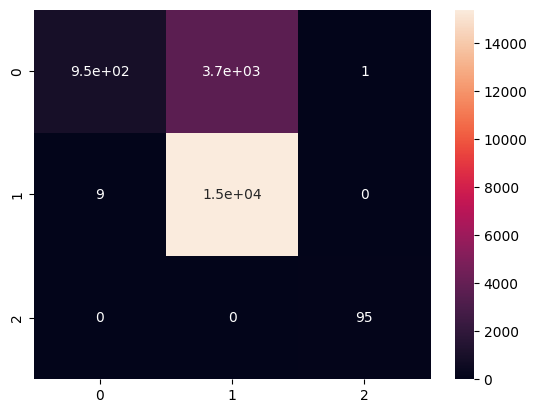

In [178]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)

In [179]:
df["Loan Status"].value_counts()

Loan Status
Fully Paid     77361
Charged Off    22639
Name: count, dtype: int64